In [29]:
import os
import json
import numpy as np
import itertools as it
import qutip as qt

In [75]:
def hamming_distance(i,j,N):
    arr_i = np.array([int(s) for s in bin(i)[2:].zfill(N)])
    arr_j = np.array([int(s) for s in bin(j)[2:].zfill(N)])
    return int(np.sum(arr_i != arr_j))

def max_hamming_distance(gs, N):
    max_h_d = 0
    for i in range(len(gs)):
        for j in range(i+1,len(gs)):
            h_d = hamming_distance(gs[i],gs[j],N)
            if h_d > max_h_d:
                max_h_d = h_d
    
    return max_h_d




def disconnectivity(fair_sampling_gs: qt.Qobj, N: int) -> int:
    min_delta_m = 100
    disconnectivity = 0

    ent_cache = {}

    for bp_size in range(2,N + 1):
        for bp in list(it.combinations(range(N), bp_size)):
            
            s_m = round(qt.entropy_vn(fair_sampling_gs.ptrace(list(bp))),5)
            ent_cache[bp] = s_m
            
            min_sub_m_ent = 100000
            for s_bp_size in range(1,bp_size):
                for sbp in list(it.combinations(list(bp), s_bp_size)):
                    if sbp in ent_cache:
                        sub_m_ent = round(2*ent_cache[sbp],5)
                    else:
                        sub_m_ent = round(2*qt.entropy_vn(fair_sampling_gs.ptrace(list(sbp))),5)
                    if sub_m_ent < min_sub_m_ent:
                        min_sub_m_ent = sub_m_ent

            delta_m = s_m/min_sub_m_ent if min_sub_m_ent != 0 else 1

                

    

            if delta_m < min_delta_m:
                disconnectivity = bp_size
                min_delta_m = delta_m
                # print(min_delta_m)
                if abs(min_delta_m) < 1e-5 :
                    # it's zero, we found the lowest possible
                    break
        else:
            continue
        break

    return disconnectivity

In [78]:
degeneracy = 8
N = 8

directory = f'../../data/instances/inf_d/{N}/gs_{degeneracy}'


max_hds = []
disc = []

for filename in os.listdir(directory):
    with open(f"{directory}/{filename}", 'r') as file:
        data = json.load(file)
    gs = json.loads(data['gs'])
    reduced_gs = gs[:degeneracy//2]
    
    # Implement better way to find reduced gs


    # Make graph based on Hamming Ds

    # Make Laplacian

    # Find second eigenvalue

    # Break along negative positive

    

    max_hds.append(max_hamming_distance(reduced_gs,N))

    fair_sampling_gs = np.zeros([2**N,1])
    for g in reduced_gs:
        fair_sampling_gs[g] = 1/np.sqrt(len(reduced_gs))
    fair_sampling_gs = qt.Qobj(fair_sampling_gs, dims = [[2 for i in range(N)], [1 for i in range(N)]])

    disc.append(disconnectivity(fair_sampling_gs,N))
    
    # break

print(max_hds)
print(disc)


[6, 6, 4, 6, 4, 6, 4, 4, 6, 6, 6, 6, 6, 6, 6]
[7, 6, 4, 7, 4, 7, 4, 4, 7, 7, 6, 7, 7, 7, 7]


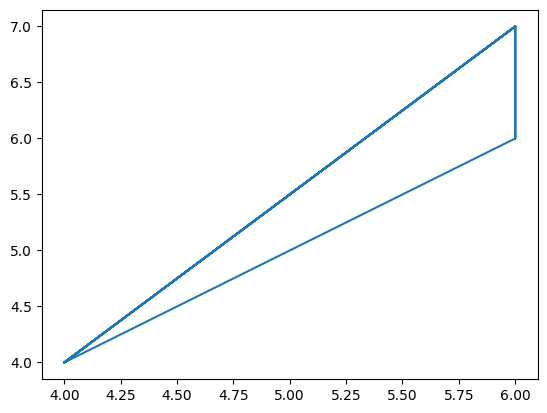

In [79]:
import matplotlib.pyplot as plt

plt.plot(max_hds,disc)

In [97]:
N=8
gs_array = [9, 30, 225, 246]
print(gs_array)
print([bin(i)[2:].zfill(N) for i in gs_array] )
dim = len(gs)

Aij = np.zeros((dim,dim))


for i in range(dim):
    for j in range(dim):
        if i != j:
            Aij[i][j] = Aij[j][i] = np.exp(-hamming_distance(gs[i],gs[j],8))



Deg = np.zeros((dim,dim))
np.fill_diagonal(Deg,[sum(row) for row in Aij])

Lap = Deg - Aij





print(Aij)
print(Deg)
print(Lap)


eva, evec = np.linalg.eig(Lap)

print(eva)
print(evec)

[9, 30, 225, 246]
['00001001', '00011110', '11100001', '11110110']
[[0.         0.01831564 0.01831564 0.00033546]
 [0.01831564 0.         0.00033546 0.01831564]
 [0.01831564 0.00033546 0.         0.01831564]
 [0.00033546 0.01831564 0.01831564 0.        ]]
[[0.03696674 0.         0.         0.        ]
 [0.         0.03696674 0.         0.        ]
 [0.         0.         0.03696674 0.        ]
 [0.         0.         0.         0.03696674]]
[[ 0.03696674 -0.01831564 -0.01831564 -0.00033546]
 [-0.01831564  0.03696674 -0.00033546 -0.01831564]
 [-0.01831564 -0.00033546  0.03696674 -0.01831564]
 [-0.00033546 -0.01831564 -0.01831564  0.03696674]]
[2.08166817e-17 3.73022030e-02 7.32625556e-02 3.73022030e-02]
[[ 5.00000000e-01  7.07106781e-01  5.00000000e-01  1.02072509e-01]
 [ 5.00000000e-01  3.25703014e-16 -5.00000000e-01 -6.99700795e-01]
 [ 5.00000000e-01 -3.34963291e-16 -5.00000000e-01  6.99700795e-01]
 [ 5.00000000e-01 -7.07106781e-01  5.00000000e-01 -1.02072509e-01]]


In [238]:


def overlap_distribution(gs, N):
    overlap_dist = []
    for i in range(len(gs)):
        
        for j in range(i,len(gs)):

            h_d = hamming_distance(gs[i],gs[j],N)
            overlap_dist.append((N-2*h_d)/N)
    
    return overlap_dist

[63, 95, 160, 192]
['00111111', '01011111', '10100000', '11000000']
[(0, 1), 2]
[0.27067057 0.         0.27067057 0.        ]
[1 3 0 2]
[ 0.70710678 -0.70710678  0.          0.        ]
[0.         0.         0.70710678 0.70710678]
[95]


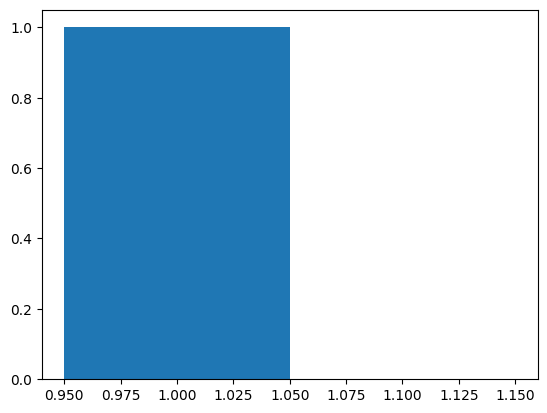

[160, 192]


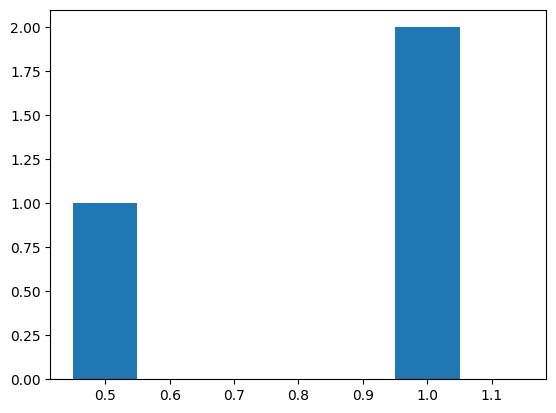

In [293]:


N=8
# gs_array = [3, 12, 19, 24, 26, 27, 28, 33, 35, 37, 44, 45, 82, 83, 90, 92, 94, 99, 100, 101, 103, 108, 115, 124, 131, 140, 147, 152, 154, 155, 156, 161, 163, 165, 172, 173, 210, 211, 218, 220, 222, 227, 228, 229, 231, 236, 243, 252]
# gs_array = [9, 30, 225, 246]
# gs_array = [9, 30, 45, 53, 202, 210, 225, 246]
# gs_array = [18, 43, 45, 210, 212, 237]
# gs_array = [44, 47, 82, 84, 171, 173, 208, 211]
# gs_array = [71, 78, 119, 136, 177, 184]
# gs_array  = [33, 45, 53, 60, 65, 66, 68, 78, 86, 101, 108, 116, 126, 129, 139, 147, 154, 169, 177, 187, 189, 190, 195, 202, 210, 222]
gs_array = [63, 95, 160, 192]
print(gs_array)
print([bin(i)[2:].zfill(N) for i in gs_array] )
dim = len(gs_array)

Aij = np.zeros((dim,dim))

max_h_d = 0
m_h_d_info = []
for i in range(dim):
    for j in range(dim):
        if i != j:
            h_d = hamming_distance(gs_array[i],gs_array[j],8)
            if h_d > max_h_d and h_d <= N/2:
                max_h_d = h_d
                m_h_d_info = [(i,j), h_d]
            if h_d <= N/2:
                Aij[i][j] = Aij[j][i] = np.exp(-h_d)


print(m_h_d_info)
Deg = np.zeros((dim,dim))
np.fill_diagonal(Deg,[sum(row) for row in Aij])

Lap = Deg - Aij





# print(Aij)
# print(Deg)
# print(Lap)


evals, evec = np.linalg.eig(Lap)

print(evals)
evec_i = evals.argsort()[1]
print(evals.argsort())
evec_1 = evec[:,evec_i]
evec_2 = evec[:,evals.argsort()[2]]


print(evec_2)
print(evec_1)



reduced_gs = []

for i in range(len(evec_2)):
    if evec_2[i] < 0:
        reduced_gs.append(gs_array[i])

print(reduced_gs)

overlap_dist = overlap_distribution(reduced_gs,N)



bin_width = 0.1
shift_amount = bin_width/2
left_edge = np.min(overlap_dist) - shift_amount
right_edge = np.max(overlap_dist) + shift_amount

plt.hist(overlap_dist,bins=np.arange(left_edge, right_edge + bin_width, bin_width))
plt.show()


reduced_gs = []

for i in range(len(evec_1)):
    if evec_1[i] > 0:
        reduced_gs.append(gs_array[i])

print(reduced_gs)

# reduced_gs = [33, 45, 53, 60, 65, 66, 68, 78, 86, 101, 108, 116, 126, 129, 139, 147, 154, 169, 177, 187, 189, 190, 195, 202, 210, 222]

overlap_dist = overlap_distribution(reduced_gs,N)



bin_width = 0.1
shift_amount = bin_width/2
left_edge = np.min(overlap_dist) - shift_amount
right_edge = np.max(overlap_dist) + shift_amount

plt.hist(overlap_dist,bins=np.arange(left_edge, right_edge + bin_width, bin_width))
plt.show()



In [285]:
import networkx as nx


N=8
# gs_array = [3, 12, 19, 24, 26, 27, 28, 33, 35, 37, 44, 45, 82, 83, 90, 92, 94, 99, 100, 101, 103, 108, 115, 124, 131, 140, 147, 152, 154, 155, 156, 161, 163, 165, 172, 173, 210, 211, 218, 220, 222, 227, 228, 229, 231, 236, 243, 252]
# gs_array = [9, 30, 225, 246]
# gs_array = [9, 30, 45, 53, 202, 210, 225, 246]
# gs_array = [18, 43, 45, 210, 212, 237]
# gs_array = [44, 47, 82, 84, 171, 173, 208, 211]
# gs_array = [71, 78, 119, 136, 177, 184]
gs_array  = [33, 45, 53, 60, 65, 66, 68, 78, 86, 101, 108, 116, 126, 129, 139, 147, 154, 169, 177, 187, 189, 190, 195, 202, 210, 222]
print(gs_array)
print([bin(i)[2:].zfill(N) for i in gs_array] )
dim = len(gs_array)



maximal_clique_len = 0
min_hd_gt = N
max_h_d = N/2
while maximal_clique_len < dim/2:
    Aij = np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            if i != j:
                h_d = hamming_distance(gs_array[i],gs_array[j],N)
                if h_d <= max_h_d:
                    Aij[i][j] = Aij[j][i] = np.exp(-h_d)
                else:
                    if h_d < min_hd_gt:
                        min_hd_gt = h_d
    max_h_d = min_hd_gt


    maximal_clique = max(nx.find_cliques(nx.Graph(Aij)), key=len)
    maximal_clique_len = len(maximal_clique)


# print(Aij)
print(nx.Graph(Aij))


print("maximal clique:", maximal_clique)
print("maximal clique length:", maximal_clique_len)
print("len(gs)/2:", dim//2)




[33, 45, 53, 60, 65, 66, 68, 78, 86, 101, 108, 116, 126, 129, 139, 147, 154, 169, 177, 187, 189, 190, 195, 202, 210, 222]
['00100001', '00101101', '00110101', '00111100', '01000001', '01000010', '01000100', '01001110', '01010110', '01100101', '01101100', '01110100', '01111110', '10000001', '10001011', '10010011', '10011010', '10101001', '10110001', '10111011', '10111101', '10111110', '11000011', '11001010', '11010010', '11011110']
runs
runs
Graph with 26 nodes and 312 edges
maximal clique: [0, 24, 2, 3, 4, 20, 19, 18, 8, 16, 10, 11, 12]
maximal clique length: 13
len(gs)/2: 13


In [290]:
np.sort([gs_array[i] for i in [0, 24, 2, 3, 4, 20, 19, 18, 8, 16, 10, 11, 12]])

array([ 33,  53,  60,  65,  86, 108, 116, 126, 154, 177, 187, 189, 210])

In [ ]:
[33, 45, 53, 60, 65, 101, 108, 116, 129, 169, 177, 187, 189]